## 4.1 データ確認

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

### 4.1.1 数値的・統計的に分析する方法

#### タイタニック・データセットの読み込み

#### タイタニック・データセットの各項目

**生存**(survival) : (0=死亡、1=生存)     
**等室** (pclass) : (1=1等船室 2=2等船室 3=3等船室)  
**性別** (sex) :  (male=男性、female=女性)  
**年齢** (age)  
**兄弟配偶者数** (sibsp) : 同乗している兄弟と配偶者の数   
**両親子供数** (parch) : 同乗している両親と子供の数  
**料金** (fare)  
**乗船港コード**(embarked) :    
(C=Cherbourg、Q=Queenstown、S=Southampton)   
**等室名** (class) : (First=一等船室 Second=二等船室 Third=三等船室)  
**男女子供** (who) : (man=男　women=女　child=子供)  
**成人男子** (adult_male):  True / False  
**デッキ** (deck):  船室番号の頭文字 (A - G)  
**乗船港** (embark_town) : Southampton/Cherbourg/Queenstown  
**生存可否** (alive): yes / no   
**独身** (alone): True / False  



In [3]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_titanic = sns.load_dataset("titanic")

# 項目名の日本語化
columns_t = ['生存', '等室', '性別', '年齢', '兄弟配偶者数', 
             '両親子供数', '料金', '乗船港コード', '等室名', 
             '男女子供', '成人男子', 'デッキ', '乗船港', '生存可否', '独身']
df_titanic.columns = columns_t

# データの内容
display(df_titanic.head())

,生存,等室,性別,年齢,兄弟配偶者数,両親子供数,料金,乗船港コード,等室名,男女子供,成人男子,デッキ,乗船港,生存可否,独身
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 項目ごとの欠損値を調べる

In [4]:
df_titanic.shape

(891, 15)

In [5]:
print(df_titanic.isnull().sum())

生存          0
等室          0
性別          0
年齢        177
兄弟配偶者数      0
両親子供数       0
料金          0
乗船港コード      2
等室名         0
男女子供        0
成人男子        0
デッキ       688
乗船港         2
生存可否        0
独身          0
dtype: int64


#### 特定の項目の項目値をそれぞれの個数を調べる

In [6]:
# 項目「乗船港」の項目値ごとの個数
print(df_titanic['乗船港'].value_counts())
print()

# 項目「生存可否」の項目値ごとの個数
print(df_titanic['生存可否'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 乗船港, dtype: int64

no     549
yes    342
Name: 生存可否, dtype: int64


#### 統計情報を調べる

In [7]:
display(df_titanic.describe())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


#### グループごとの集計 (集約関数)

In [8]:
display(df_titanic.groupby('性別').mean())

,生存,等室,年齢,兄弟配偶者数,両親子供数,料金,成人男子,独身
性別,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


#### グラフ表示 (数値項目)

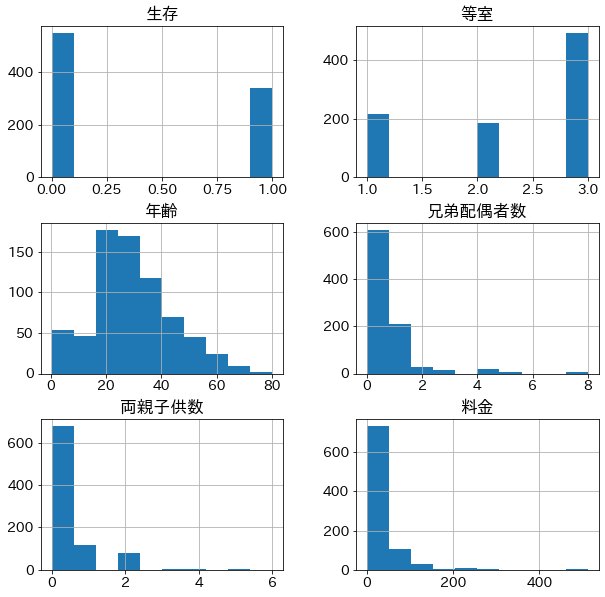

In [9]:
# 分析対象項目のグラフ表示 (数値項目の場合)

# 数値項目の定義
columns_n = ['生存', '等室', '年齢', '兄弟配偶者数', '両親子供数', '料金']

# グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (10, 10)

# データフレームの数値項目でヒストグラム表示
df_titanic[columns_n].hist()
plt.show()

#### グラフ表示 (非数値項目)

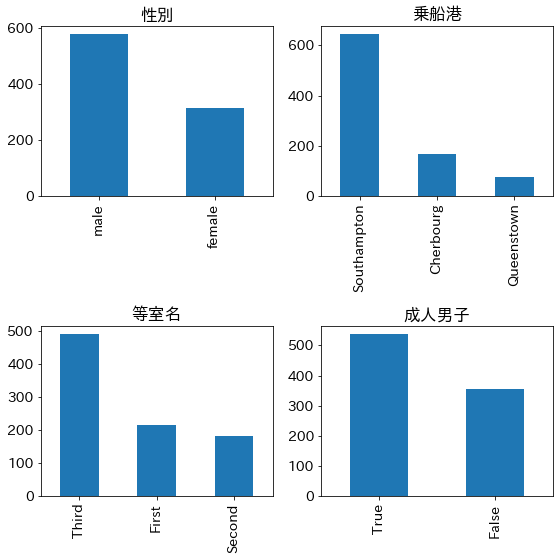

In [10]:
# 分析対象項目のグラフ表示 (非数値項目の場合)

# グラフ化対象列の定義
columns_c = ['性別', '乗船港', '等室名', '成人男子']

# グラフ描画領域の調整
plt.rcParams['figure.figsize'] = (8, 8)

# ループ処理で、ヒストグラムの表示
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)
    
# レイアウトの調整    
plt.tight_layout() 
plt.show()

### 4.1.2 視覚的に分析・確認する方法

#### アイリス・データセットの読み込み

#### アイリス・データセットの各項目

**がく片長**(sepal_length)  
**がく片幅**(sepal_width)  
**花弁長**(petal_length)  
**花弁幅**(petal_width)  
  
**種別**(species):  versicolor/setosa/virginica

In [11]:
# 追加ライブラリのimport
import seaborn as sns

# サンプルデータの読み込み
df_iris = sns.load_dataset("iris")

# 項目名の日本語化
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# データの内容
display(df_iris.head())

,がく片長,がく片幅,花弁長,花弁幅,種別
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


#### 散布図表示

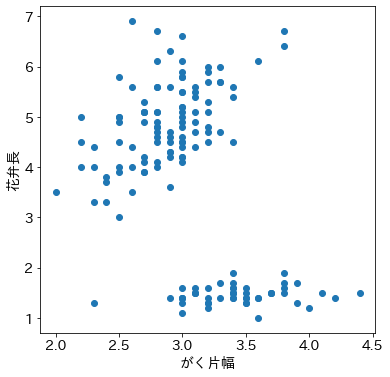

In [12]:
# 散布図表示 matplotlib版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

# 散布図の表示
plt.scatter(df_iris['がく片幅'], df_iris['花弁長'])

# ラベル表示
# sepal がく petal 花弁
plt.xlabel('がく片幅')
plt.ylabel('花弁長')
plt.show()

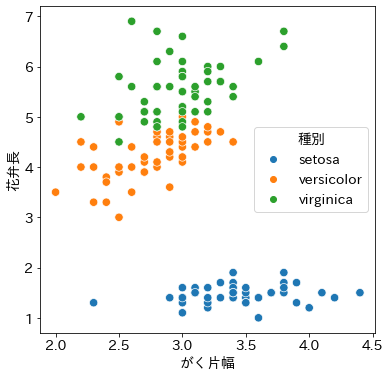

In [13]:
# 散布図表示  seaborn版(1)

plt.figure(figsize=(6,6))
sns.scatterplot(x='がく片幅', y='花弁長', hue='種別', s=70,
    data=df_iris)
plt.show()

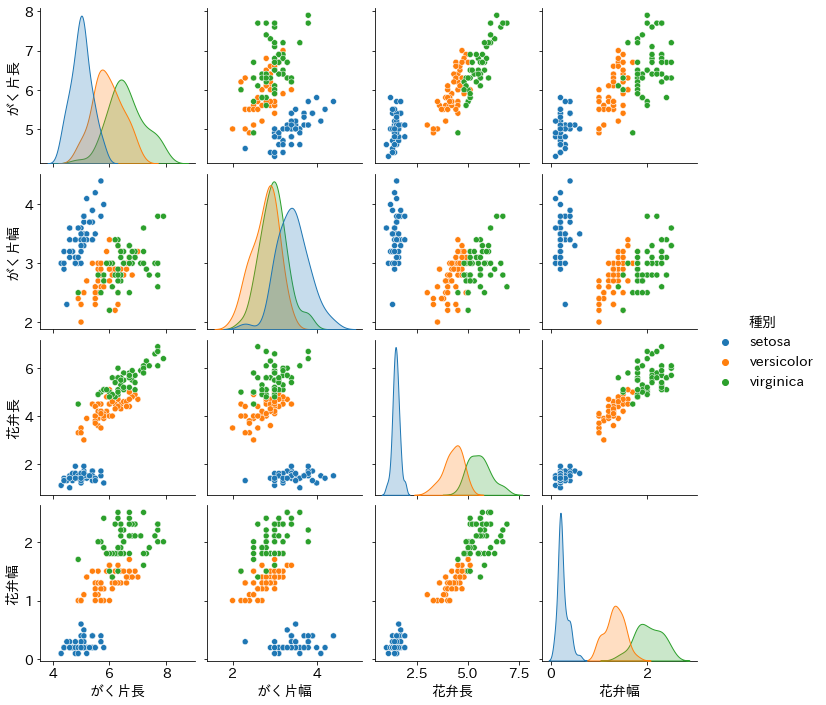

In [14]:
# 全散布図同時表示

sns.pairplot(df_iris, hue="種別")
plt.show()

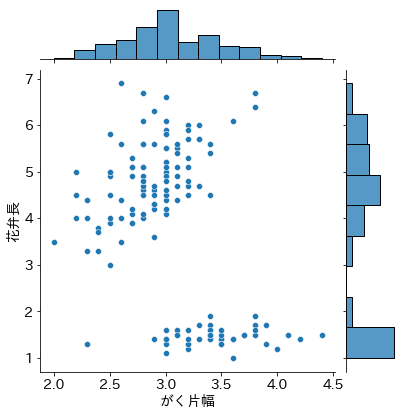

In [15]:
# 散布図表示  seaborn版(2)

sns.jointplot('がく片幅', '花弁長', data=df_iris)
plt.show()

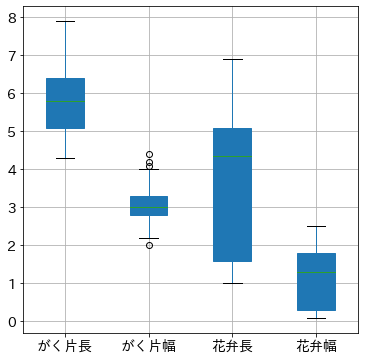

In [16]:
# 箱ひげ図表示 matplotlib版

# グラフ描画領域の調整
plt.figure(figsize=(6,6))

# 箱ひげ図の描画
df_iris.boxplot(patch_artist=True)
plt.show()

In [17]:
# melt関数によるデータの事前加工
# seaborn の boxplot を利用するために、「variable」「value」の形式にする
w = pd.melt(df_iris, id_vars=['種別'])

# 加工結果の確認
display(w.head())

,種別,variable,value
0,setosa,がく片長,5.1000
1,setosa,がく片長,4.9000
2,setosa,がく片長,4.7000
3,setosa,がく片長,4.6000
4,setosa,がく片長,5.0000


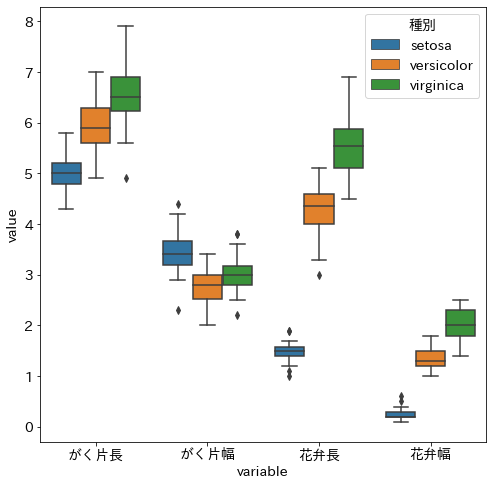

In [24]:
# seabornによる箱ひげ図表示

# hueパラメータを追加し、花の種類で箱ひげ図を書き分ける
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=w, hue='種別')
plt.show()